In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore", category = np.VisibleDeprecationWarning)

# 1. Обучение однослойного персептрона решению линейно разделимых задач. Функции «And» и «Or». Метод простого перебора



* Два входа, один выход
* Обучающая выборка – таблицы истинности
* Функция активация – ступенчатая
* Значения весов перебирать в цикле (например, от -1 до +1 с шагом 0.1)
* Ошибку считать по МНК
* Запоминать все значения весов, при которых ошибка равна 0

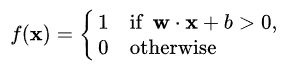

In [ ]:
import numpy as np
import pandas as pd

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])
y_and = np.array([0, 0, 0, 1])
w_or = []
w_and = []
y_pred_or = []
y_pred_and = []

df = pd.DataFrame({'X1': x[:, 0], 'X2': x[:, 1],
                  'OR': y_or, 'AND': y_and},
                  columns=['X1', 'X2', 'OR', 'AND'])
df

,X1,X2,OR,AND
0,0,0,0,0
1,0,1,1,0
2,1,0,1,0
3,1,1,1,1


In [ ]:
def step_func(u):
        return 1 if (u > 0) else 0

In [ ]:
def perceptron(x, y, weights):
  for i in np.arange(-1.0, 1.1, 0.1):
    for j in np.arange(-1.0, 1.1, 0.1):
      for q in np.arange(-1.0, 1.1, 0.1):
        fail = 0
        w = np.array([i, j, q])
        for k, m in np.array(list(zip(x, y))):
            k = np.insert(k, len(k), 1, axis=0)
            y_pred = np.matmul(k, w.T)
            y_pred = step_func(y_pred)
            err = m - y_pred
            if err != 0:
              fail += 1
        if fail == 0:
          weights.append(w)

In [ ]:
perceptron(x, y_or, w_or)
perceptron(x, y_and, w_and)

for k in x:
  k = np.insert(k, len(k), 1, axis=0)
  y_pred = np.dot(k, w_or[0].T)
  y_pred_or.append(step_func(y_pred))
  y_pred = np.dot(k, w_and[0].T)
  y_pred_and.append(step_func(y_pred))

df.insert(3, "OR_pred", y_pred_or, True)
df.insert(5, "AND_pred", y_pred_and, True)

In [ ]:
df

,X1,X2,OR,OR_pred,AND,AND_pred
0,0,0,0,0,0,0
1,0,1,1,1,0,0
2,1,0,1,1,0,0
3,1,1,1,1,1,1


# 2.	Обучение однослойного персептрона  методами направленного обучения (по аналогии с советчиками)

* То же самое, что и ЛР№1, но используется не перебор, а направленное обучение
* Веса корректируются исходя из ошибки
* Обучающая выборка – таблицы истинности
* Функция активация – ступенчатая. Предпочтительней – sign(x)
* Начальное значение весов берем случайно
* Последующее значение – wi+1 = wᵢ + Δw
* Δwᵢ = ɛ * x * d * |wᵢ|
* d = A – Y ошибка (разность между эталонным и расчетным значениями) 

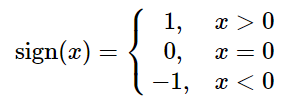

In [ ]:
import numpy as np
import pandas as pd

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_or = np.array([0, 1, 1, 1])
Y_and = np.array([0, 0, 0, 1])
W_or = np.random.rand(3,)
W_and = np.random.rand(3,)

y_pred_or = []
y_pred_and = []

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'OR': Y_or, 'AND': Y_and},
                  columns = ['X1', 'X2', 'OR', 'AND'])
df

,X1,X2,OR,AND
0,0,0,0,0
1,0,1,1,0
2,1,0,1,0
3,1,1,1,1


In [ ]:
def sign(u):
  return 1 if (u > 0) else 0 

In [ ]:
def perceptron(x_i, w):
  sum = np.matmul(x_i, w.T)
  y_pred = sign(sum)
  return y_pred

In [ ]:
def training(x, y, w, b = 1, lr = 0.1, num_iter = 50):
  for iter_num in range(num_iter):
    for x_i, y_i in np.array(list(zip(x, y))):
      x_i = np.insert(x_i, len(x_i), b, axis = 0)
      y_pred = perceptron(x_i, w)
      err = y_i - y_pred
      w += lr*err*x_i
  return w

In [ ]:
W_or = np.copy(training(X, Y_or, W_or))
W_and = np.copy(training(X, Y_and, W_and))

for k in X:
  k = np.insert(k, len(k), 1, axis = 0)
  y_pred_or.append(perceptron(k, W_or))
  y_pred_and.append(perceptron(k, W_and))

In [ ]:
df.insert(3, "OR_pred", y_pred_or, True)
df.insert(5, "AND_pred", y_pred_and, True)

In [ ]:
df

,X1,X2,OR,OR_pred,AND,AND_pred
0,0,0,0,0,0,0
1,0,1,1,1,0,0
2,1,0,1,1,0,0
3,1,1,1,1,1,1


# 3.	Обучение многослойной нейронной сети решению линейно неразделимых задач. Функция «Exclusive Or»

* То же самое, что и Лаб. 2, но используется многослойный персептрон
* НС: 2 слоя, 2 входа, 1 выход

In [ ]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])

Y_xor = np.array([0, 1, 1, 0])
Y_or = np.array([0, 1, 1, 1])
Y_and = np.array([0, 0, 0, 1])

W_or = np.random.rand(3,)
W_and = np.random.rand(3,)
W_not = np.random.rand(2,)

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1],
                  'OR': Y_or, 'AND': Y_and, 'XOR': Y_xor},
                  columns=['X1', 'X2', 'OR', 'AND', 'XOR'])
df

,X1,X2,OR,AND,XOR
0,0,0,0,0,0
1,0,1,1,0,1
2,1,0,1,0,1
3,1,1,1,1,0


In [ ]:
X_not = np.array([[0], [1]])
Y_not = np.array([1, 0])

df_not = pd.DataFrame({'X': X_not[:, 0], 'NOT': Y_not},
                  columns=['X', 'NOT'])
df_not

,X,NOT
0,0,1
1,1,0


In [ ]:
def sign(u):
  return 1 if (u > 0) else 0

def perceptron(x_i, w):
  sum = np.dot(x_i, w.T)
  y_pred = sign(sum)
  return y_pred

def training(x, y, w, b = 1, lr = 0.1, num_iter = 50):
    for iter_num in range(num_iter):
      for x_i, y_i in np.array(list(zip(x, y))):
        x_i = np.insert(x_i, len(x_i), b, axis = 0)
        y_pred = perceptron(x_i, w)       
        err = y_i - y_pred
        w += lr*err*x_i
    return w

In [ ]:
# обучение логическому ИЛИ
W_or = np.copy(training(X, Y_or, W_or))
# обучение логическому И
W_and = np.copy(training(X, Y_and, W_and))

y_pred_or = []
y_pred_and = []

for k in X:
  k = np.insert(k, len(k), 1, axis=0)
  y_pred_or.append(perceptron(k, W_or))
  y_pred_and.append(perceptron(k, W_and))

df.insert(3, "OR_pred", y_pred_or, True)
df.insert(5, "AND_pred", y_pred_and, True)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


,X1,X2,OR,OR_pred,AND,AND_pred,XOR
0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,1
2,1,0,1,1,0,0,1
3,1,1,1,1,1,1,0


In [ ]:
# обучение логическому НЕ
W_not = np.copy(training(X_not, Y_not, W_not))

y_pred_not = []

for k in X_not:
  k = np.insert(k, len(k), 1, axis=0)
  y_pred_not.append(perceptron(k, W_not))

df_not.insert(2, "NOT_pred", y_pred_not, True)

df_not

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


,X,NOT,NOT_pred
0,0,1,1
1,1,0,0


In [ ]:
def XOR_perceptron(x):
	x = np.insert(x, len(x), 1, axis = 0)
 
	h_and = perceptron(x, W_and.T)
	h_or = perceptron(x, W_or.T)
	h_and = np.array([h_and, 1])
	h_not_and = perceptron(h_and, W_not.T)
 
	h = np.array([h_or, h_not_and])
	h = np.insert(h, len(h), 1, axis = 0)
	y_pred = perceptron(h, W_and.T)
	return y_pred

In [ ]:
y_pred_xor = []

for k in X:
  y_pred_xor.append(XOR_perceptron(k))

df.insert(7, "XOR_pred", y_pred_xor, True)

df

,X1,X2,OR,OR_pred,AND,AND_pred,XOR,XOR_pred
0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,1,1
2,1,0,1,1,0,0,1,1
3,1,1,1,1,1,1,0,0


# 4.	Обучение многослойной нейронной сети по методу обратного распространения ошибки.

* То же самое, что и Лаб. 3, но уже используется метод градиентного спуска и алгоритм обратного распространения ошибки
* НС: 3 слоя 3 входа, 1 выход

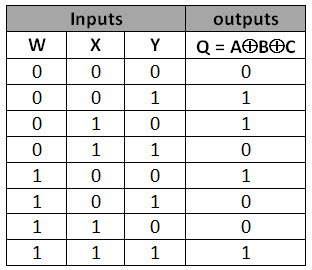

In [23]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([0, 1, 1, 0])

df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Y': Y},
                  columns=['X1', 'X2', 'Y'])
df

,X1,X2,Y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [27]:
X.shape[1]

2

In [ ]:
Y.shape

(8,)

In [24]:
def sign(u):
  return 1 if (u > 0) else 0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 + x)

def squared_err(y, y_pred):
  return 0.5 * (y - y_pred)**2

def squared_err_derivative(y, y_pred):
  return y_pred - y

def perceptron(x_i, w):
  sum = np.dot(x_i, w.T)
  y_pred = sigmoid(sum)
  return y_pred

In [28]:

np.random.seed(42)
lr = 0.1
num_iter = 50000
W1 = np.random.random(size=(2,2))
W2 = np.random.random(size=(2,1))
b1 = np.random.random(size=(2,))
b2 = np.random.random(size=(1,))
losses=[]
for x_i, y_i in np.array(list(zip(X, Y))):
# while True:
  for _ in range(num_iter):
      # feedforward
      layer0 = x_i
      layer1 = sigmoid(np.dot(layer0.T, W1) + b1)
      layer2 = sigmoid(np.dot(layer1, W2) + b2)
      # print(layer0.shape, layer1.shape, layer2.shape)
      loss = -(1/2)*np.sum(y_i*np.log(layer2)+(1-y_i)*np.log(1-layer2))
      losses.append(loss)

      # # backprop
      layer2_err = squared_err_derivative(y_i, layer2) * sigmoid_derivative(layer1)
      layer1_err = np.dot(layer2_err, W2) * sigmoid_derivative(layer0)
      # print(layer2_err, layer1_err)
      # upd weights
      W2 -= lr * np.dot(layer1, layer2_err)
      W1 -= lr * np.dot(layer0, layer1_err)
      b2 -= lr * np.sum(layer2_err)
      b1 -= lr * np.sum(layer1_err)

In [16]:
print(W2.shape,W1.shape)

(2, 1) (2, 2)


In [26]:
for x_i, y_i in np.array(list(zip(X, Y))):
  layer0 = x_i
  layer1 = sigmoid(np.dot(layer0.T, W1) + b1)
  layer2 = sigmoid(np.dot(layer1, W2) + b2)
  print(x_i, y_i, layer2)

[0 0] 0 [0.01223913]
[0 1] 1 [0.0123839]
[1 0] 1 [0.01238385]
[1 1] 0 [0.01238418]


Text(0, 0.5, 'Loss value')

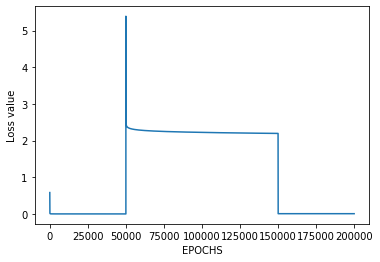

In [31]:
import matplotlib.pyplot as plt

# We plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [ ]:
class MultilayerPerceptron(object):
    def __init__(self):
        self.w = None

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def _delsigmoid(self, x):
        return x * (1 - x)

    def feed_forward():
        hidden_layer =

SyntaxError: ignored

In [ ]:
import itertools
import numpy as np

np.random.seed(42) # this makes sure you get the same results as me

def xor(x1, x2):
    return bool(x1) != bool(x2)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sigmoid_result):
    return sigmoid_result * (1 - sigmoid_result)

def error(target, prediction):
    return .5 * (target - prediction)**2

def error_derivative(target, prediction):
    return - target + prediction

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[xor(*i)] for i in x], dtype=int)

alpha = 0.02
n_neurons_input, n_neurons_hidden, n_neurons_output = 2, 2, 1

w_hidden = np.random.random(size=(n_neurons_input, n_neurons_hidden))
b_hidden = np.random.random(size=(1, n_neurons_hidden))

w_output = np.random.random(size=(n_neurons_hidden, n_neurons_output))
b_output = np.random.random(size=(1, n_neurons_output))

errors = []
params = []
grads = []
while True:
    # forward prop
    y_hidden = sigmoid(np.dot(x, w_hidden) + b_hidden)
    y_output = sigmoid(np.dot(y_hidden, w_output) + b_output)
    # calculate mean error of all the errors for this epoch
    e = error(y, y_output).mean()
    if e < 1e-4:
        break
    # back prop
    grad_output = error_derivative(y, y_output) * sigmoid_derivative(y_output)
    grad_hidden = grad_output.dot(w_output.T) * sigmoid_derivative(y_hidden)

    # update parameters
    w_output -= alpha * y_hidden.T.dot(grad_output)
    w_hidden -= alpha * x.T.dot(grad_hidden)

    b_output -= alpha * np.sum(grad_output)
    b_hidden -= alpha * np.sum(grad_hidden)

    # record intermediate results
    errors.append(e)
    grads.append(np.concatenate((grad_output.ravel(), grad_hidden.ravel())))
    params.append(np.concatenate((w_output.ravel(), b_output.ravel(),
                                  w_hidden.ravel(), b_hidden.ravel())))

In [ ]:
def predict(x):
  y_hidden = sigmoid(np.dot(x, w_hidden) + b_hidden)
  return sigmoid(np.dot(y_hidden, w_output) + b_output)
predict(x)

array([[0.01505756],
       [0.98652214],
       [0.98652109],
       [0.01448912]])

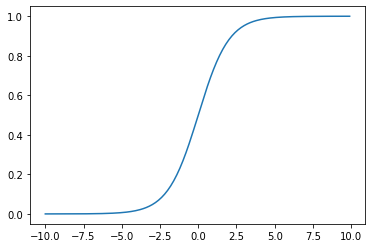

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(-10., 10., 0.1)

def sign(u):
  a = []
  for i in u:
    a.append(1/(1+np.exp(-i)))
  return a

y = sign(x)

# plot the function
plt.plot(x, y)

# show the plot
plt.show()

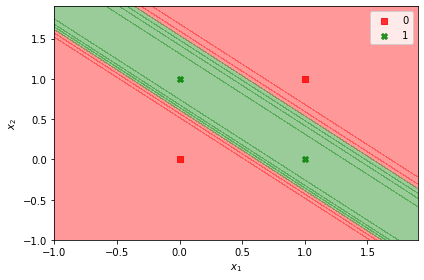

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def predict(x):
    y_hidden = sigmoid(np.dot(x, w_hidden) + b_hidden)
    return sigmoid(np.dot(y_hidden, w_output) + b_output)

markers = ('s', 'X')
colors = ('red', 'green')

x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))

z = predict(np.array([xx1.ravel(), xx2.ravel()]).T)
z = z.reshape(xx1.shape)

fig, ax = plt.subplots()
ax.contourf(xx1, xx2, z, alpha=0.4, cmap=ListedColormap(colors))
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    ax.scatter(x=x[(y == cl).ravel(), 0],
               y=x[(y == cl).ravel(), 1],
               alpha=0.8, c=colors[idx],
               marker=markers[idx], label=cl)
ax.legend()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.tight_layout()

In [ ]:
class MultilayerPerceptron(object):
    def __init__(self):
        self.w = None
    
    def fit(self, X, y, epochs=10, lr=0.1, batch_size=100):
        n, k = X.shape        
        if self.w is None:
            np.random.seed(42)
            # Вектор столбец в качестве весов
            self.w = np.random.randn(k + 1)

        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        losses = []

        # Положите в лист losses лосс на каждом батче. Не нужно усреднять лосс по эпохе.

        for i in range(epochs):
            for X_batch, y_batch in generate_batches(X_train, y, batch_size):
                #В X_train уже добавлен вектор 1

                predictions = #YOUR CODE: предскажите вероятности на X_batch
                loss = #YOUR CODE: вычислите loss на текущем батче 

                assert (np.array(loss).shape == tuple()), "Лосс должен быть скаляром!" 

                losses.append(<YOUR CODE>)
                
                #YOUR CODE: обновите self.w по формуле градиентного спуска. Используйте функцию self.get_grad для вычисления градиента. Не забудьте про learning rate!

        return losses
    
    def get_grad(self, X_batch, y_batch, predictions):
        """

        param X_batch: np.array[batch_size, n_features + 1] --- матрица объекты-признаки
        param y_batch: np.array[batch_size] --- батч целевых переменных
        param predictions: np.array[batch_size] --- батч вероятностей классов

        Принимает на вход X_batch с уже добавленной колонкой единиц. 
        Выдаёт градиент функции потерь в логистической регрессии
        как сумму градиентов функции потерь на всех объектах батча
        ВНИМАНИЕ! Нулевая координата вектора весов -- это BIAS, а не вес признака. 
        Также не нужно ДЕЛИТЬ ГРАДИЕНТ НА РАЗМЕР БАТЧА:
        нас интересует не среднее, а сумма. 
        В качестве оператора умножения матриц можно использовать @ 

        Выход -- вектор-столбец градиентов для каждого веса (np.array[n_features + 1])
        """

        #компонент градиента из логрегрессии 
        #следите за размерностями
        
        grad_basic = #YOUR CODE
        assert grad_basic.shape == (X_batch.shape[1],) , "Градиенты должны быть столбцом из k_features + 1 элементов"

        return grad_basic
        
    def predict_proba(self, X):
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def _predict_proba_internal(self, X): 
        """
        Возможно, вы захотите использовать эту функцию вместо predict_proba, поскольку
        predict_proba конкатенирует вход с вектором из единиц, что не всегда удобно
        для внутренней логики вашей программы
        """
        return sigmoid(logit(X, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w.copy() 
        # copy тут используется неспроста. Если copy не использовать, то get_weights()
        # выдаст ссылку на объект, а, значит, модифицируя результат применения функции
        # get_weights(), вы модифицируете и веса self.w. Если вы хотите модифицировать веса, 
        # (например, в fit), используйте self.w
      
    def __loss(self, y, p):  
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# 5.	Обучение нейронной сети для моделирования работы 7 сегментного индикатора с 4 выходами


# 6.	Обучение нейронной сети для моделирования работы 7 сегментного индикатора с 10  выходами. Визуализация индикатора

# 7.	Обучение нейронной сети для моделирования задач прогнозирования.

# 8.	Обучение нейронной сети для моделирования сети или карты Кохонена